In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings

In [2]:
plt.style.use('ggplot')

In [3]:
warnings.filterwarnings('ignore')

In [4]:
matplotlib.rcParams['figure.figsize'] = (10,20)

In [5]:
df = pd.read_csv('../database/price-of-cars.csv')

In [6]:
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [7]:
df.shape

(2095, 14)

In [8]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'seats', 'max_power (in bph)',
       'Mileage Unit', 'Mileage', 'Engine (CC)'],
      dtype='object')

In [9]:
print(df["Mileage Unit"].unique())
print(df["owner"].unique())
print(df["seller_type"].unique())
print(df["seats"].unique())

['kmpl' 'km/kg']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
['Individual' 'Dealer' 'Trustmark Dealer']
[5 7 8 4]


In [10]:
df['name'].unique()

array(['Maruti', 'Hyundai', 'Toyota', 'Ford', 'Mahindra', 'Tata',
       'Volkswagen', 'Renault', 'Chevrolet', 'Honda'], dtype=object)

In [11]:
df1 = df.drop(['Mileage Unit', 'Unnamed: 0', 'seller_type', 'Engine (CC)', 'fuel'], axis='columns')

In [12]:
df1.head()

,name,year,selling_price,km_driven,transmission,owner,seats,max_power (in bph),Mileage
0,Maruti,2014,450000,145500,Manual,First Owner,5,74.00,23.40
1,Hyundai,2010,225000,127000,Manual,First Owner,5,90.00,23.00
2,Hyundai,2017,440000,45000,Manual,First Owner,5,81.86,20.14
3,Toyota,2011,350000,90000,Manual,First Owner,5,67.10,23.59
4,Ford,2013,200000,169000,Manual,First Owner,5,68.10,20.00


In [13]:
df1.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage               0
dtype: int64

In [14]:
mean_price_by_seats = df.groupby('seats')['selling_price'].mean()
mean_price_by_seats = mean_price_by_seats.sort_index()

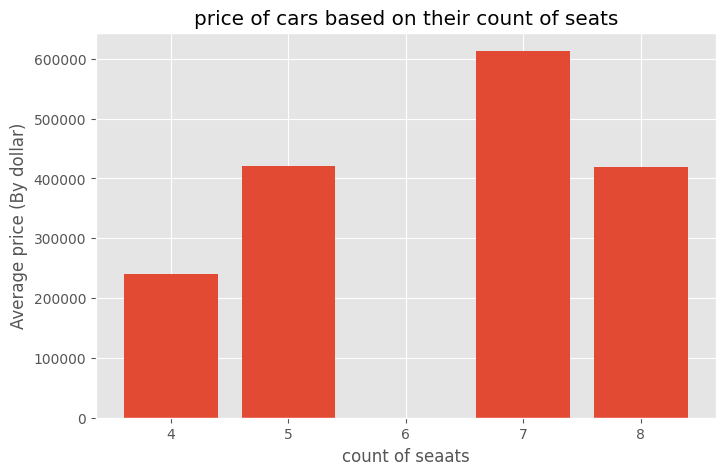

In [15]:
plt.figure(figsize=(8, 5))
plt.bar(mean_price_by_seats.index, mean_price_by_seats.values)

plt.xlabel('count of seaats')
plt.ylabel('Average price (By dollar)')
plt.title('price of cars based on their count of seats')

plt.show()


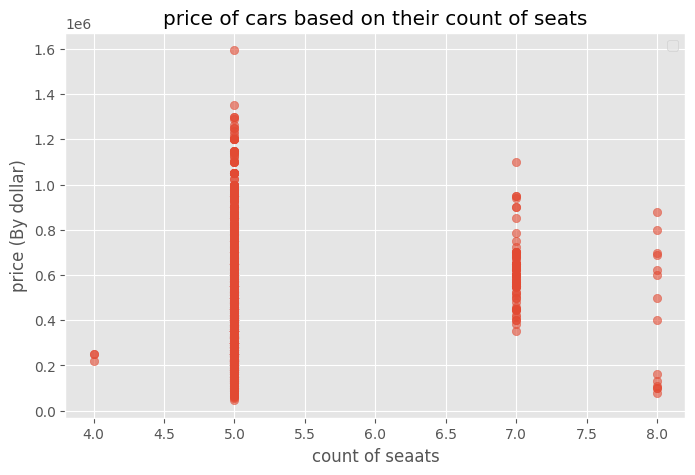

In [16]:
df_scatter = df[['seats', 'selling_price']]

plt.figure(figsize=(8, 5))
plt.scatter(df_scatter['seats'], df_scatter['selling_price'], alpha=0.6)

plt.xlabel('count of seaats')
plt.ylabel('price (By dollar)')
plt.title('price of cars based on their count of seats')
plt.legend()
plt.show()


In [17]:
df1[
    (df1['seats'] == 8) & (df['selling_price'] < 300000)
].shape[0]

6

In [18]:
len(df1.loc[df1['seats']==4])

3

In [19]:
df2 = df1[~((df['seats'] == 8) & (df['selling_price'] < 400000))]
df3 = df2[~(df['seats'] == 4)]

In [20]:
print(len(df3.loc[df3['seats']==4]))
df3[
    (df3['seats'] == 8) & (df3['selling_price'] < 300000)
].shape[0]

0


0

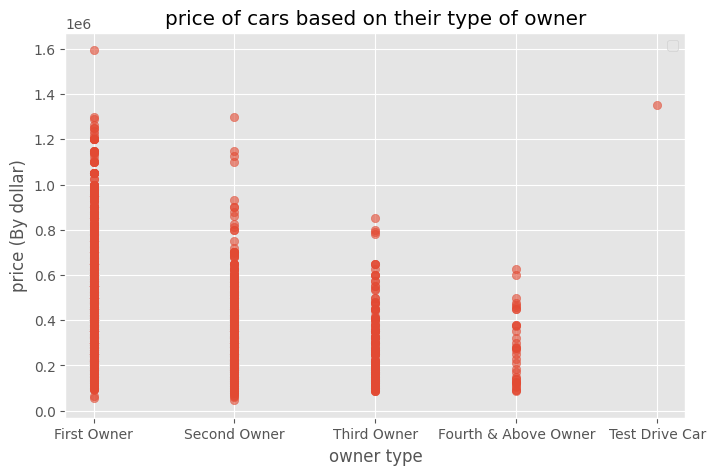

In [21]:
df_scatter = df3[['owner', 'selling_price']]

plt.figure(figsize=(8, 5))
plt.scatter(df_scatter['owner'], df_scatter['selling_price'], alpha=0.6)

plt.xlabel('owner type')
plt.ylabel('price (By dollar)')
plt.title('price of cars based on their type of owner')
plt.legend()
plt.show()


In [22]:
df4 = df3[~(df['owner'] == "Test Drive Car")]

In [23]:
df4['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [24]:
mean_price_by_transmission = df4.groupby('transmission')['selling_price'].mean()
mean_price_by_transmission = mean_price_by_transmission.sort_index()

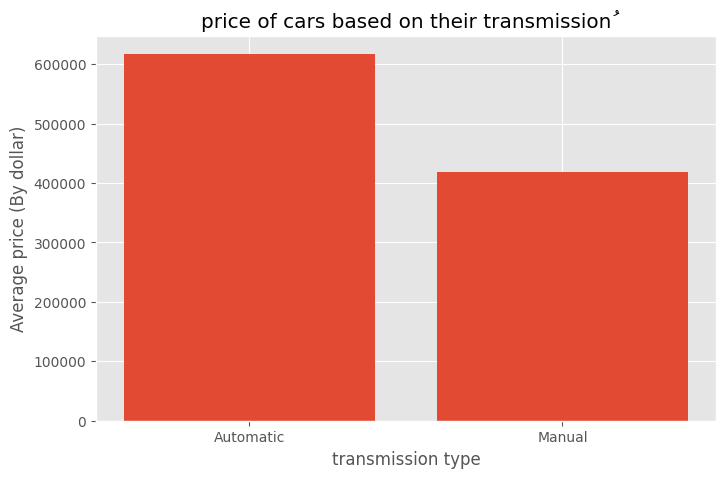

In [25]:
plt.figure(figsize=(8, 5))
plt.bar(mean_price_by_transmission.index, mean_price_by_transmission.values)

plt.xlabel('transmission type')
plt.ylabel('Average price (By dollar)')
plt.title('price of cars based on their transmissionُ')

plt.show()


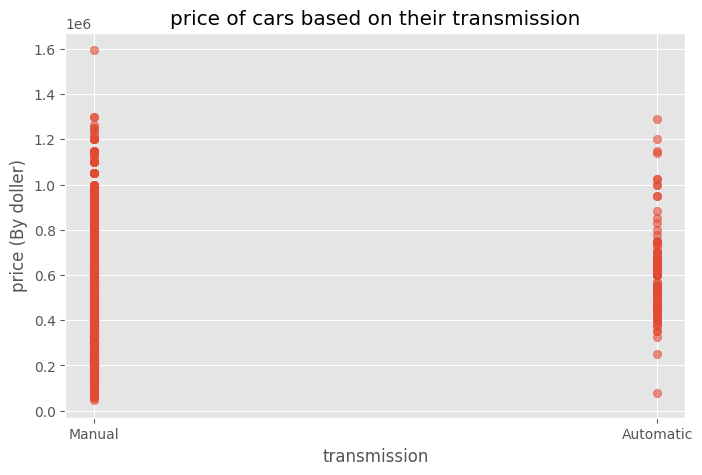

In [26]:
df_scatter = df4[['transmission', 'selling_price']]

plt.figure(figsize=(8, 5))
plt.scatter(df_scatter['transmission'], df_scatter['selling_price'], alpha=0.6)

plt.xlabel('transmission')
plt.ylabel('price (By doller)')
plt.title('price of cars based on their transmission')

plt.show()


In [27]:
p = df4.loc[df4['selling_price'] > 1500000]
df4.loc[df4['selling_price'] > 1500000]

,name,year,selling_price,km_driven,transmission,owner,seats,max_power (in bph),Mileage
541,Toyota,2017,1594000,5000,Manual,First Owner,5,86.79,21.43


In [28]:
df5 = df4.drop(int(p.index[0]))

In [29]:
df5.loc[df5['selling_price'] > 1500000]

,name,year,selling_price,km_driven,transmission,owner,seats,max_power (in bph),Mileage


In [30]:
df5.loc[(df4['selling_price'] < 300000) & (df5['transmission'] == 'Automatic')]

,name,year,selling_price,km_driven,transmission,owner,seats,max_power (in bph),Mileage
437,Honda,2008,250000,60000,Automatic,Third Owner,5,108.5,20.0
1651,Maruti,2005,80000,90000,Automatic,Second Owner,5,46.3,19.7


In [31]:
df_km = df[['km_driven', 'selling_price']].dropna()

df_km['km_driven'] = pd.to_numeric(df_km['km_driven'], errors='coerce')
df_km['selling_price'] = pd.to_numeric(df_km['selling_price'], errors='coerce')

In [32]:
bins = [0, 50_000, 100_000, 150_000, 200_000, 300_000]
labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200-300k']

df_km['km_bin'] = pd.cut(df_km['km_driven'], bins=bins, labels=labels, include_lowest=True)


In [33]:
mean_price_by_km = df_km.groupby('km_bin')['selling_price'].mean()

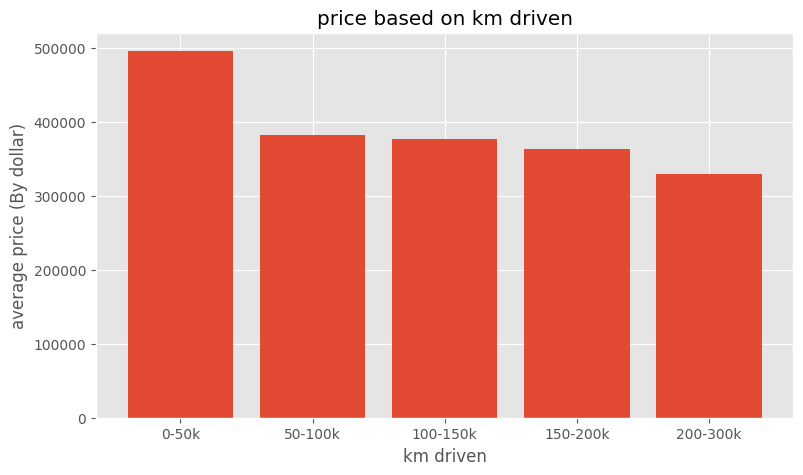

In [34]:
plt.figure(figsize=(9, 5))
plt.bar(mean_price_by_km.index, mean_price_by_km.values)

plt.xlabel('km driven')
plt.ylabel('average price (By dollar)')
plt.title('price based on km driven')

plt.show()


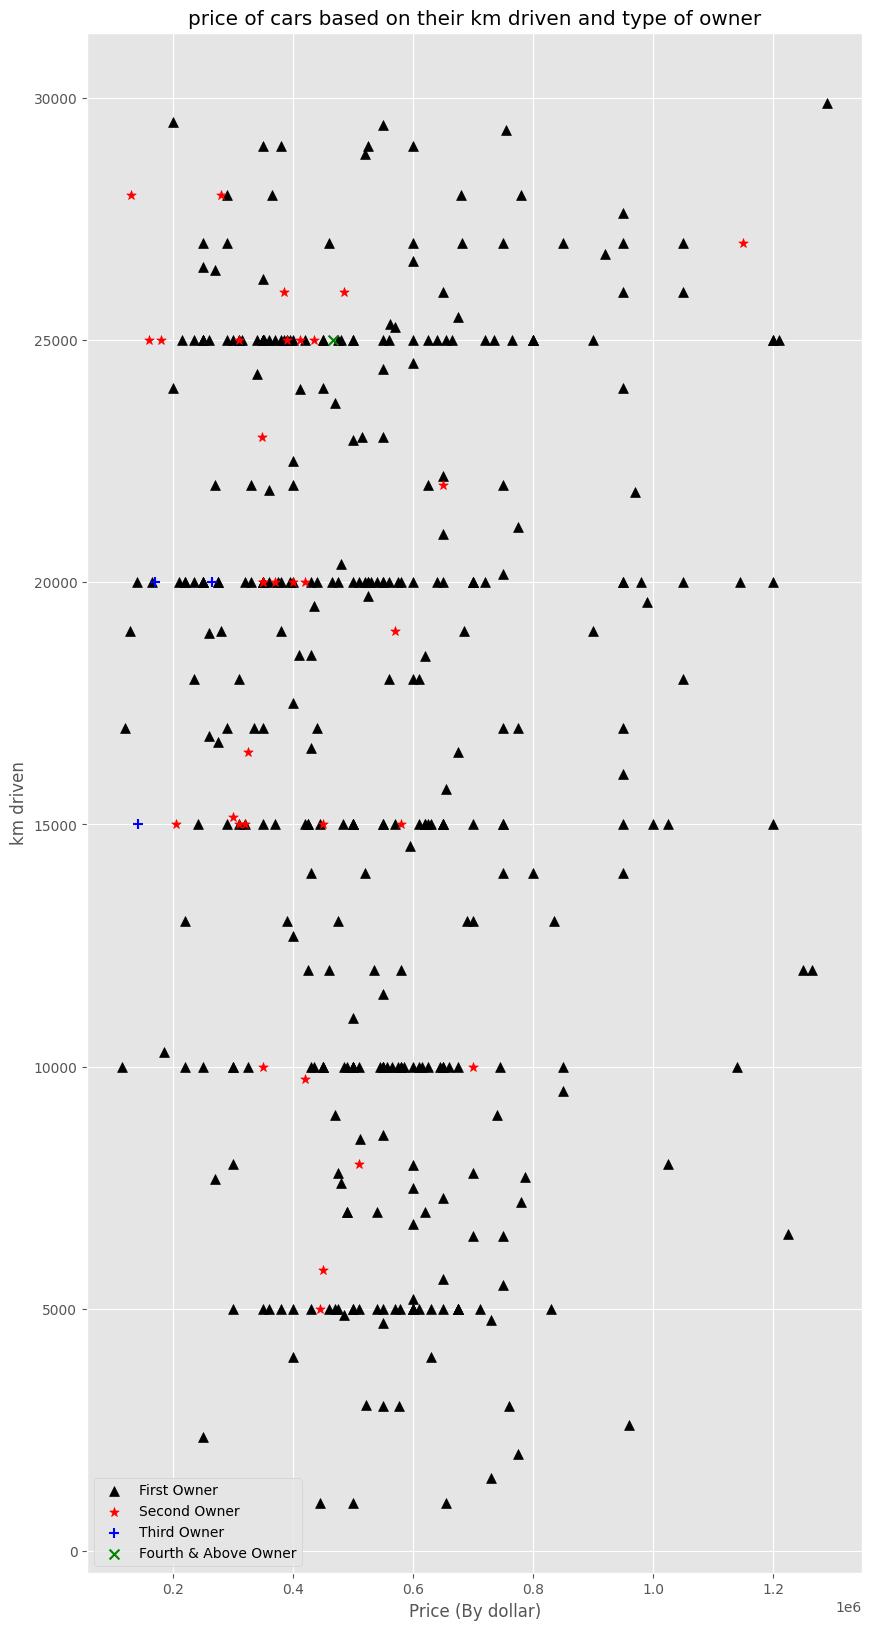

In [35]:
F = df5[(df5['owner']=='First Owner') & (df5.km_driven<30000)]
S = df5[(df5['owner']=='Second Owner') & (df5.km_driven<30000)]
T = df5[(df5['owner']=='Third Owner') & (df5.km_driven<30000)]
FA = df5[(df5['owner']=='Fourth & Above Owner') & (df5.km_driven<30000)]
plt.scatter(F.selling_price, F.km_driven, color='black', marker='^', label='First Owner', s=50)
plt.scatter(S.selling_price, S.km_driven, color='red', marker='*', label='Second Owner', s=50)
plt.scatter(T.selling_price, T.km_driven, color='blue', marker='+', label='Third Owner', s=50)
plt.scatter(FA.selling_price, FA.km_driven, color='green', marker='x', label='Fourth & Above Owner', s=50)
plt.title('price of cars based on their km driven and type of owner')
plt.ylabel('km driven')
plt.xlabel('Price (By dollar)')
plt.legend()
plt.show()

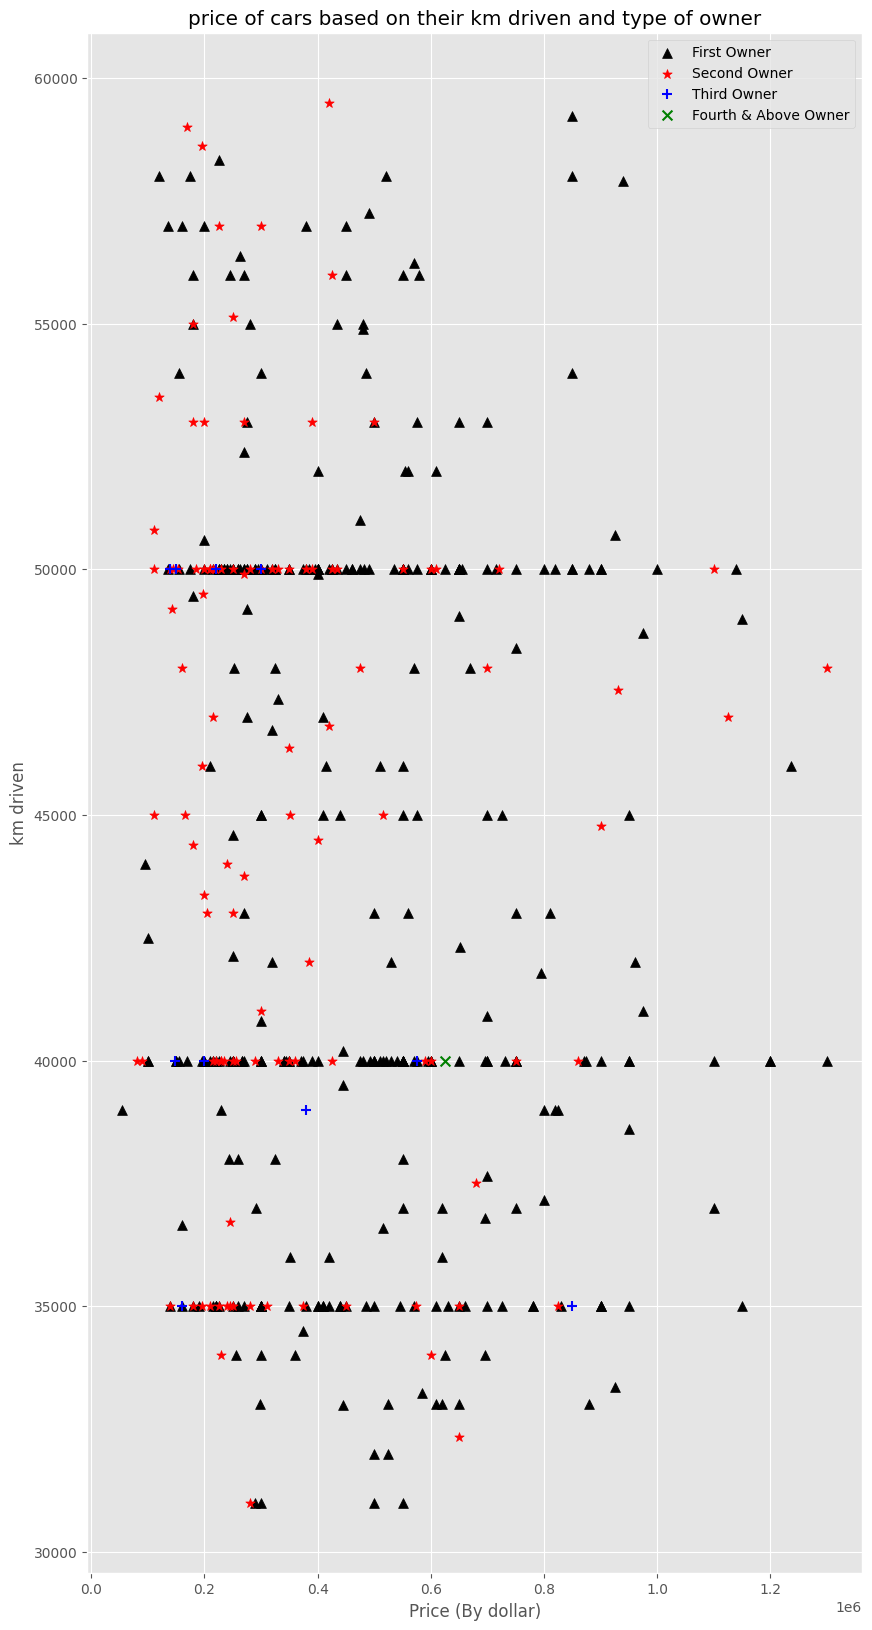

In [36]:
F = df5[(df5['owner']=='First Owner') & (df5.km_driven>30000) & (df5.km_driven<60000)]
S = df5[(df5['owner']=='Second Owner') & (df5.km_driven>30000) & (df5.km_driven<60000)]
T = df5[(df5['owner']=='Third Owner') & (df5.km_driven>30000) & (df5.km_driven<60000)]
FA = df5[(df5['owner']=='Fourth & Above Owner') & (df5.km_driven>30000) & (df5.km_driven<60000)]
plt.scatter(F.selling_price, F.km_driven, color='black', marker='^', label='First Owner', s=50)
plt.scatter(S.selling_price, S.km_driven, color='red', marker='*', label='Second Owner', s=50)
plt.scatter(T.selling_price, T.km_driven, color='blue', marker='+', label='Third Owner', s=50)
plt.scatter(FA.selling_price, FA.km_driven, color='green', marker='x', label='Fourth & Above Owner', s=50)
plt.title('price of cars based on their km driven and type of owner')
plt.ylabel('km driven')
plt.xlabel('Price (By dollar)')
plt.legend()
plt.show()

In [37]:
df5.to_csv('../database/cleaned_database.csv', index=False)